<a href="https://colab.research.google.com/github/sai977/Apparel-Recommendation/blob/master/bank2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip

--2019-09-17 05:47:39--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444572 (434K) [application/x-httpd-php]
Saving to: ‘bank-additional.zip’

bank-additional.zip 100%[===================>] 434.15K  --.-KB/s    in 0.1s    

2019-09-17 05:47:39 (2.91 MB/s) - ‘bank-additional.zip’ saved [444572/444572]



In [5]:
!unzip /content/bank-additional.zip

Archive:  /content/bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from os import system
#import graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
dataset=pd.read_csv("/content/bank-additional/bank-additional-full.csv", header='infer',sep=';') #Reading the dataset

In [8]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [11]:
dataset.groupby('job').mean().T

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
age,38.187296,39.555760,41.723214,45.500000,42.362859,62.027326,39.949331,37.926430,25.894857,38.507638,39.733728,45.563636
duration,254.312128,264.542360,263.267857,250.454717,257.058140,273.712209,264.142153,258.398085,283.683429,250.232241,249.451677,239.675758
campaign,2.623489,2.558461,2.535714,2.639623,2.476060,2.476744,2.660802,2.587805,2.104000,2.577339,2.564103,2.648485
pdays,954.319229,985.160363,981.267170,960.579245,962.647059,897.936047,976.621393,979.974049,840.217143,964.408127,935.316568,938.727273
previous,0.189023,0.122542,0.138736,0.137736,0.185021,0.327326,0.143561,0.154951,0.524571,0.153789,0.199211,0.154545
emp.var.rate,0.015563,0.248995,0.158723,0.433396,-0.012688,-0.698314,0.094159,0.175359,-1.408000,0.274566,-0.111736,0.357879
cons.price.idx,93.534054,93.656656,93.605372,93.676576,93.522755,93.430786,93.559982,93.634659,93.331613,93.561471,93.563781,93.718942
cons.conf.idx,-40.245433,-41.375816,-41.283654,-39.495283,-40.489466,-38.573081,-40.488107,-41.290048,-40.187543,-39.927569,-40.007594,-38.797879
euribor3m,3.550274,3.771996,3.791120,4.009645,3.611316,2.770066,3.689376,3.699187,1.884224,3.820401,3.466583,3.949033
nr.employed,5164.125350,5175.615150,5176.313530,5179.529623,5166.650513,5122.262151,5170.674384,5171.600126,5085.939086,5175.648391,5157.156509,5172.931818


In [12]:
dataset.groupby('marital').mean().T

marital,divorced,married,single,unknown
age,44.899393,42.307165,33.158714,40.275000
duration,253.790330,257.438623,261.524378,312.725000
campaign,2.613400,2.572810,2.533800,3.187500
pdays,968.639853,967.247673,949.909578,937.100000
previous,0.168690,0.155608,0.211359,0.275000
emp.var.rate,0.163985,0.183625,-0.167989,-0.221250
cons.price.idx,93.606563,93.597367,93.517300,93.471250
cons.conf.idx,-40.707069,-40.270659,-40.918698,-40.820000
euribor3m,3.715603,3.745832,3.317447,3.313037
nr.employed,5170.878643,5171.848772,5155.199265,5157.393750


In [13]:
dataset.groupby('education').mean().T

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
age,47.596504,40.448953,39.061208,37.998213,48.500000,40.080107,38.879191,43.481225
duration,264.827826,264.414485,261.291811,260.886810,276.777778,252.533855,253.223373,262.390526
campaign,2.600575,2.556283,2.532341,2.568576,2.277778,2.586115,2.563527,2.596187
pdays,965.704981,980.368237,979.133168,964.358382,943.833333,960.765974,951.807692,942.830734
previous,0.147031,0.129145,0.141439,0.185917,0.111111,0.163075,0.192390,0.226459
emp.var.rate,0.215924,0.231152,0.159239,0.032937,-0.133333,0.173012,-0.028090,0.059099
cons.price.idx,93.658309,93.650062,93.623399,93.584857,93.317333,93.569864,93.493466,93.658615
cons.conf.idx,-40.239871,-41.127880,-41.326749,-40.940641,-39.950000,-40.124108,-39.975805,-39.877816
euribor3m,3.751768,3.772942,3.697963,3.556157,3.516556,3.710457,3.529663,3.571098
nr.employed,5170.124880,5174.718063,5172.294012,5164.994735,5171.777778,5170.155979,5163.226298,5159.549509


Ratio of classes (no : yes) 0.8873458288821987 : 0.11265417111780131


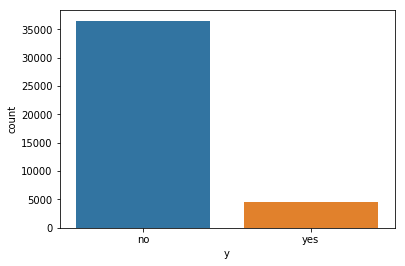

In [14]:
ratio = dataset.y[dataset.y == "yes"].count() / dataset.y.shape[0]
print('Ratio of classes (no : yes)', 1- ratio, ':', ratio)
sns.countplot(dataset.y)
plt.show()

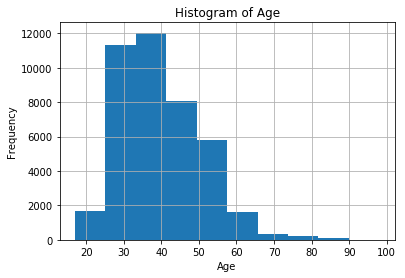

In [15]:
dataset.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

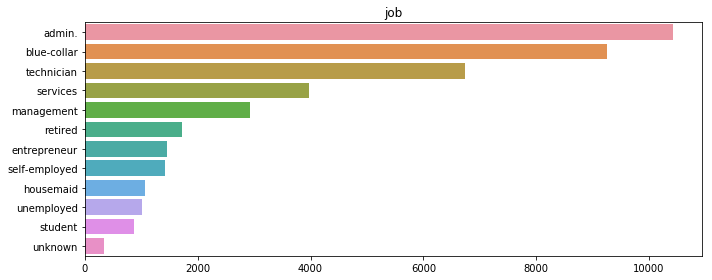

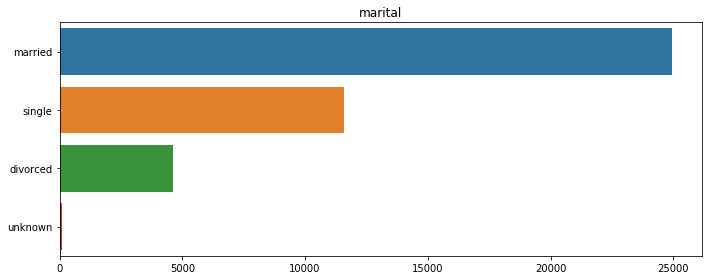

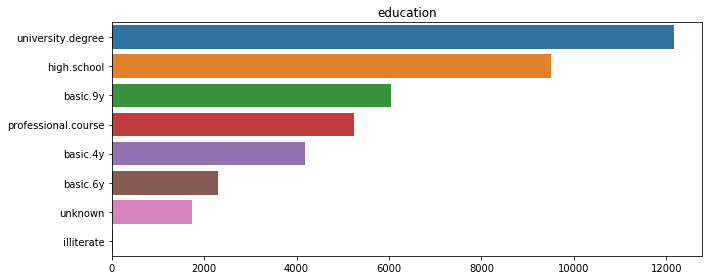

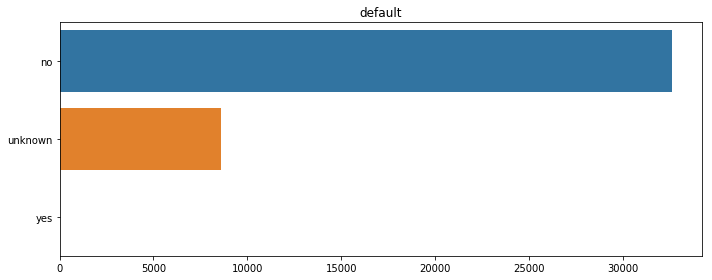

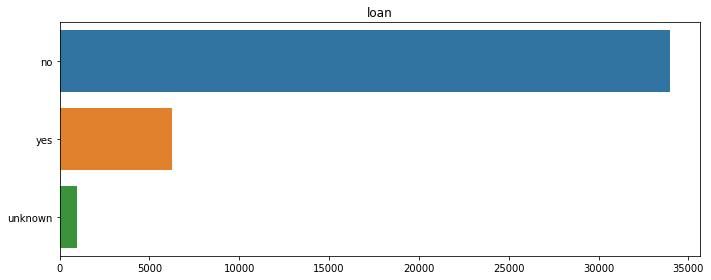

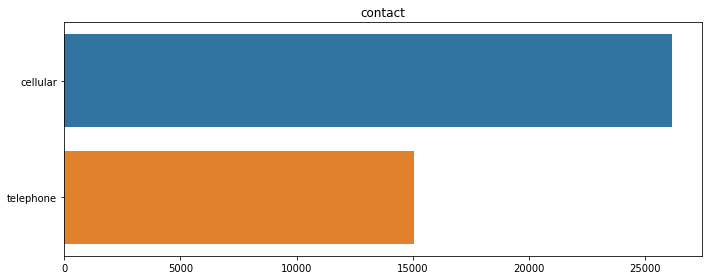

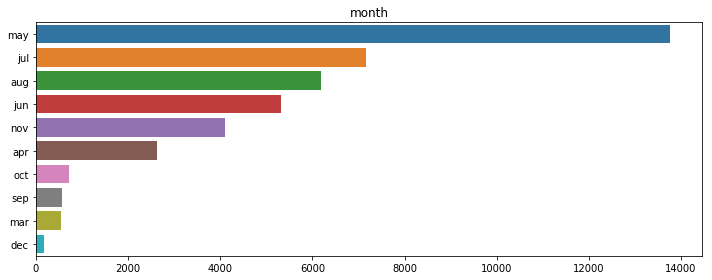

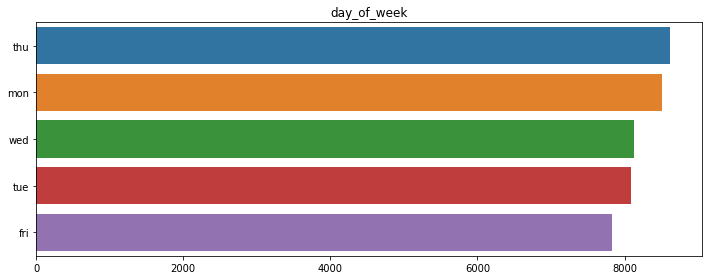

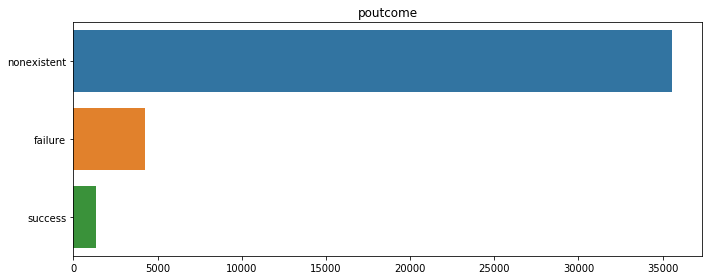

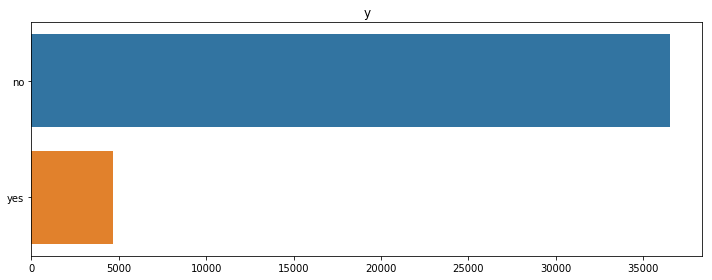

In [16]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(dataset[col].value_counts().values, dataset[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

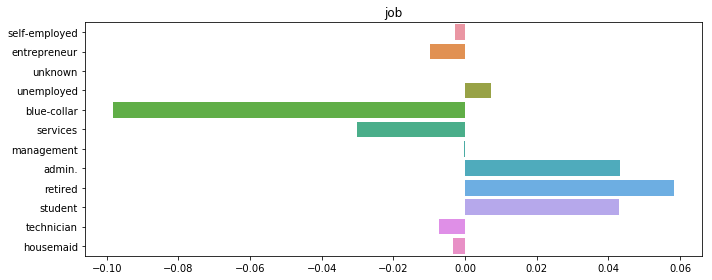

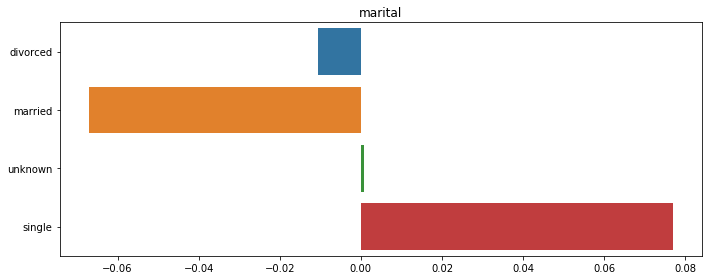

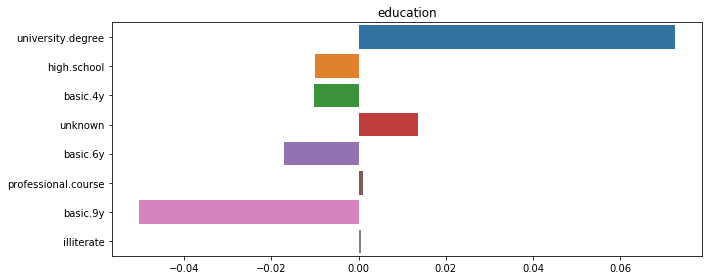

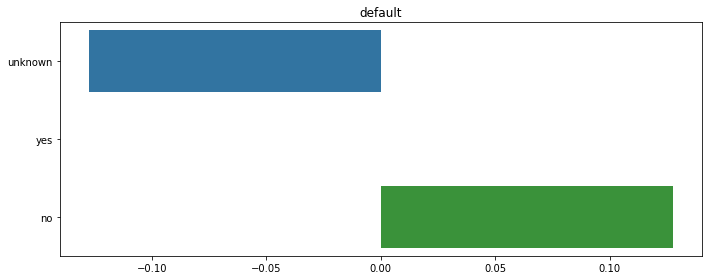

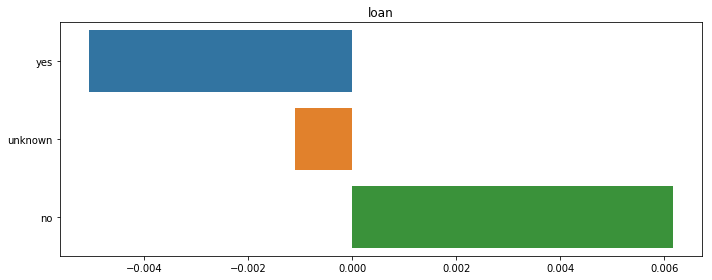

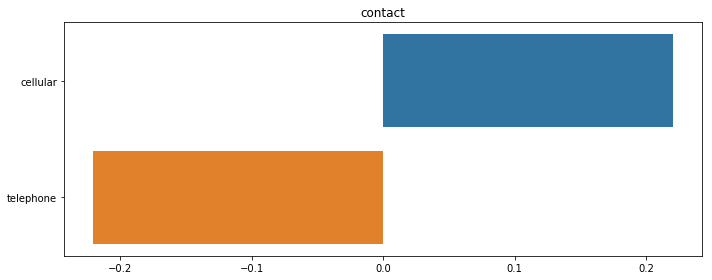

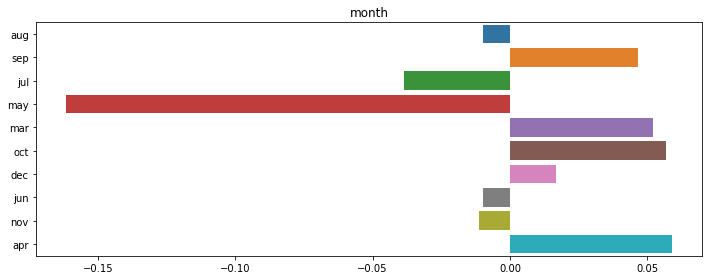

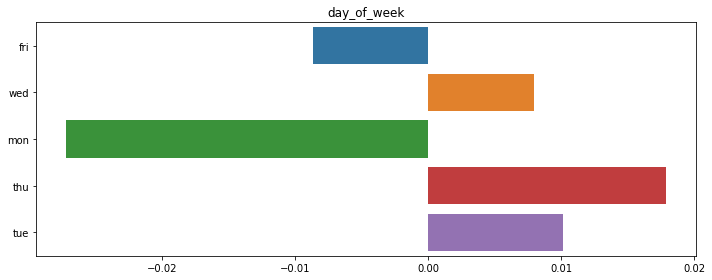

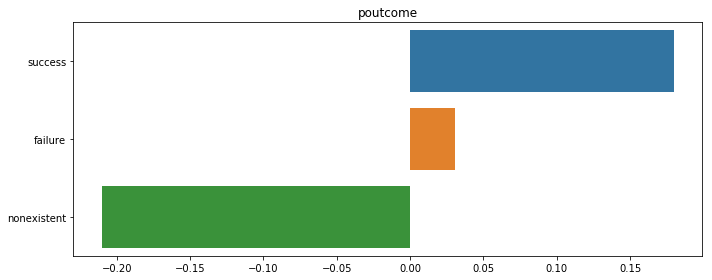

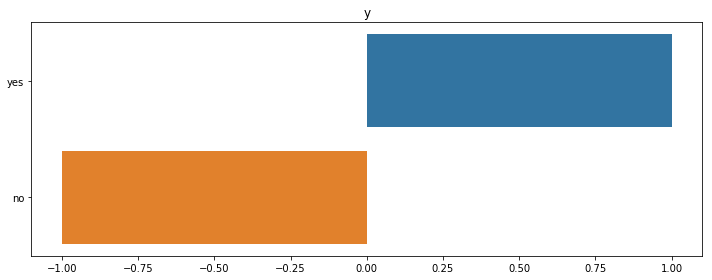

In [17]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
#Returns counts of unique values for each outcome for each feature.
    pos_counts = dataset.loc[dataset.y.values == 'yes', col].value_counts() 
    neg_counts = dataset.loc[dataset.y.values == 'no', col].value_counts()
                            
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
                            
#Counts of how often each outcome was recorded.
    freq_pos = (dataset.y.values == 'yes').sum()
    freq_neg = (dataset.y.values == 'no').sum()
                            
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
                            
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
                        
    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [18]:
print('check 1: ', dataset.groupby(['loan','y']).size())
print('\n\ncheck 2: ', dataset.groupby(['job','y']).size())
print('\n\ncheck 3: ', dataset.groupby(['marital','y']).size())
print('\n\ncheck 4: ', dataset.groupby(['education','y']).size())
print('\n\ncheck 5: ', dataset.groupby(['poutcome','y']).size())
print('\n\ncheck 6: ', dataset.groupby(['month','y']).size())
print('\n\ncheck 7: ', dataset.groupby(['y', 'default']).size())

check 1:  loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
dtype: int64


check 2:  job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
dtype: int64


check 3:  marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948

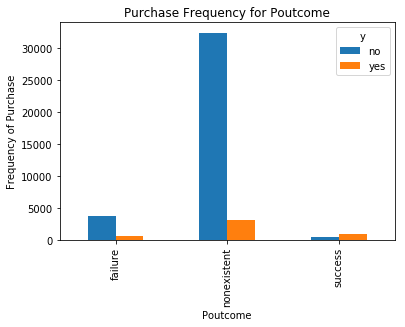

In [19]:
pd.crosstab(dataset.poutcome, dataset.y).plot(kind= 'bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
labels = ['housing', 'default', 'loan']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(dataset[label])
    dataset[label] = label_encoder.transform(dataset[label])

In [0]:
# Will be On-Hot Encoded Later
cols = ['job', 'contact', 'marital','education', 'poutcome', 'month']
for label in cols:
    label_encoder = LabelEncoder()
    label_encoder.fit(dataset[label])
    dataset[label] = label_encoder.transform(dataset[label])

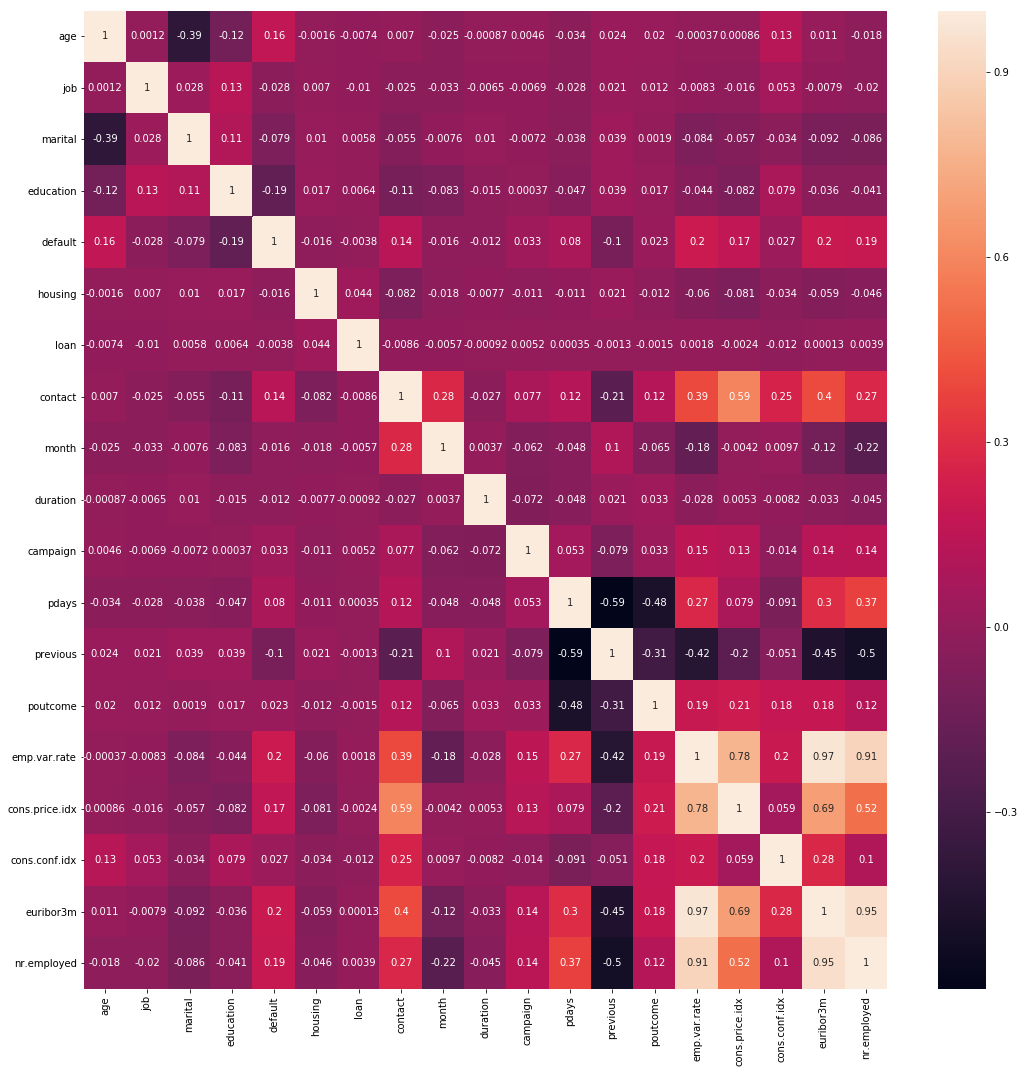

In [22]:
bank_corr = dataset.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(bank_corr, annot = True)
plt.show()

In [0]:
dataset = dataset.drop(["pdays"], axis = 1)

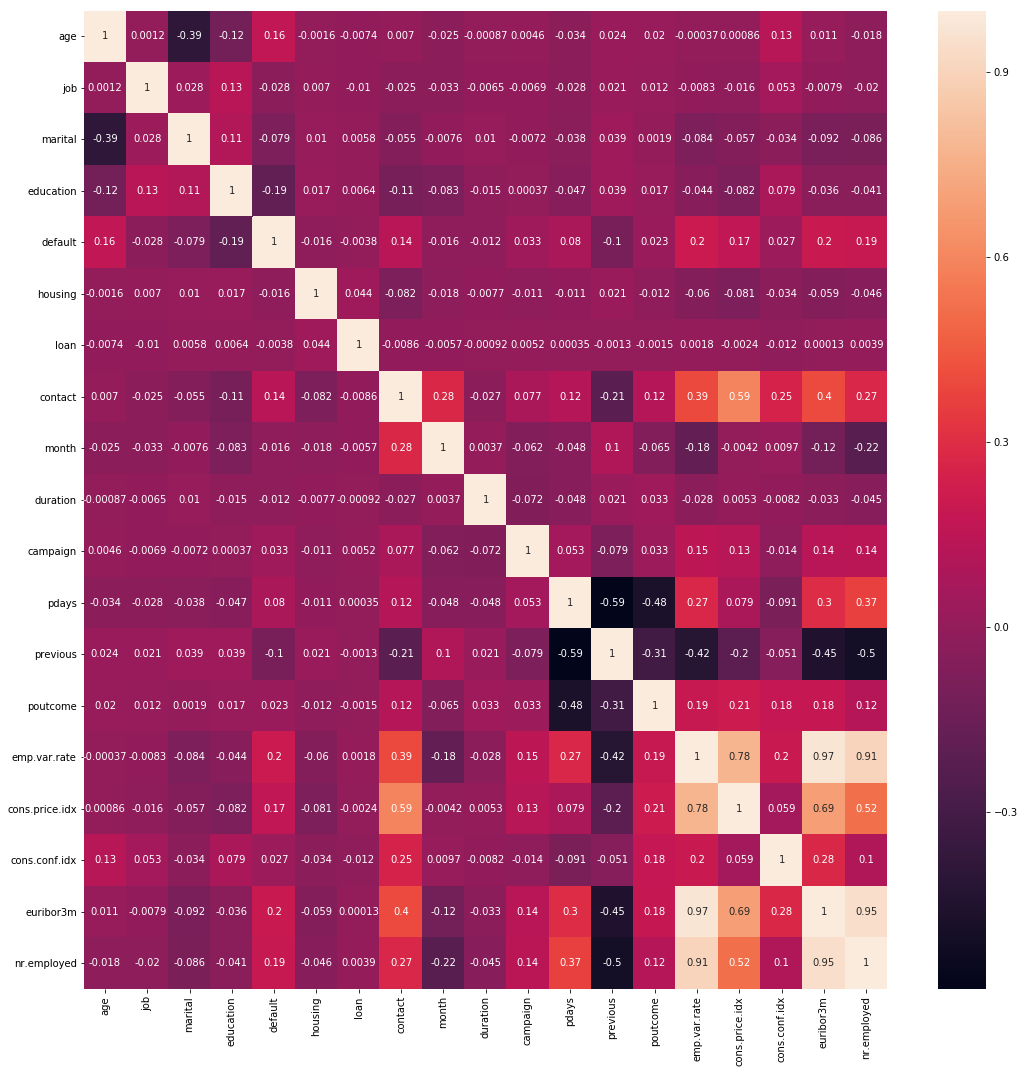

In [24]:
dataset_corr = dataset.corr()
plt.figure(figsize=(18, 18))
sns.heatmap(bank_corr, annot = True)
plt.show()

In [25]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [0]:
dataset = dataset.drop(['poutcome'],axis=1)

In [28]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,mon,261,1,0,1.1,93.994,-36.4,4.857,5191.0,no
1,57,7,1,3,1,0,0,1,6,mon,149,1,0,1.1,93.994,-36.4,4.857,5191.0,no
2,37,7,1,3,0,2,0,1,6,mon,226,1,0,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0,1,1,0,0,0,1,6,mon,151,1,0,1.1,93.994,-36.4,4.857,5191.0,no
4,56,7,1,3,0,0,2,1,6,mon,307,1,0,1.1,93.994,-36.4,4.857,5191.0,no


In [0]:
#Encoding a categorical data
def encodingdata(dataset):
    #dataset.default.replace(('yes','no'),(1,0),inplace=True)
    #dataset.housing.replace(('yes','no'),(1,0),inplace=True)
    #dataset.loan.replace(('yes','no'),(1,0),inplace=True)
    #dataset.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    #dataset.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    dataset.y.replace(('yes', 'no'), (1, 0), inplace=True)
    return dataset
dataset = encodingdata(dataset)

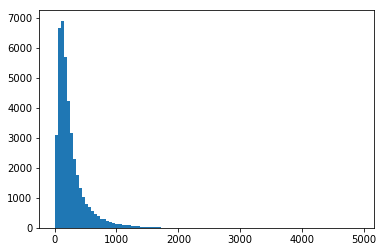

In [31]:
plt.hist((dataset.duration),bins=100)
plt.show()

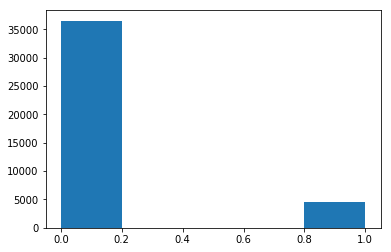

In [32]:
plt.hist((dataset.y),bins=5)
plt.show()

In [0]:
data=dataset

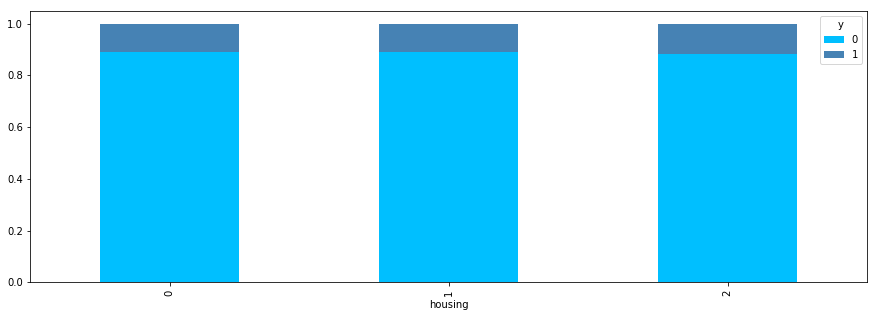

In [34]:
draw_data = pd.crosstab(data.housing, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

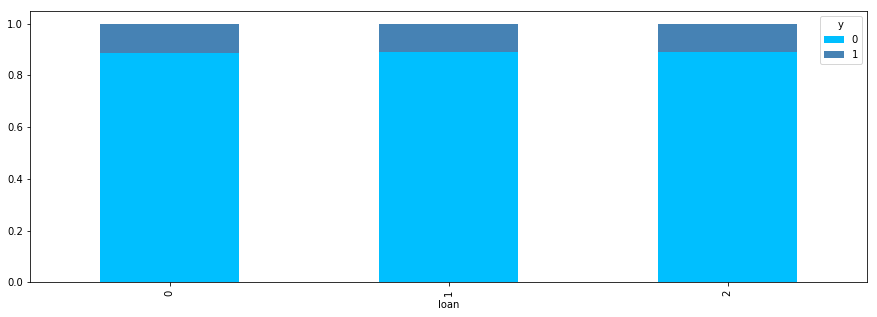

In [35]:
draw_data = pd.crosstab(data.loan, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [0]:
#Feature Engineering
def age_(data):
    
    data['Adult'] = 0
    data['Middle_Aged'] = 0
    data['old'] = 0    
    data.loc[(data['age'] <= 35) & (data['age'] >= 18),'Adult'] = 1
    data.loc[(data['age'] <= 60) & (data['age'] >= 36),'Middle_Aged'] = 1
    data.loc[data['age'] >=61,'old'] = 1
    
    return data

def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

In [0]:
data = campaign_(data)
data = age_(data)
data = education_(data)
#data = balance_(data)
data = job_(data)
#data = previous_(data)
data = duration_(data)
#data = pdays_(data)
data = marital_(data)

In [40]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'Adult', 'Middle_Aged', 'old', 'primary',
       'secondary', 'tertiary', 'unknown', 'Neg_Balance', 'No_Balance',
       'Pos_Balance', 'Not_Contacted', 'Contacted', 't_min', 't_e_min',
       'e_min', 'married', 'singles', 'divorced'],
      dtype='object')


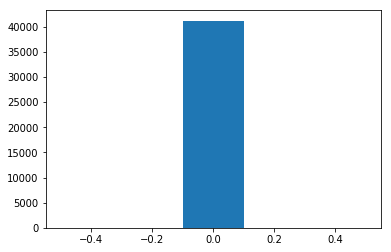

In [41]:
plt.hist(data.Contacted,bins=5)
plt.show()

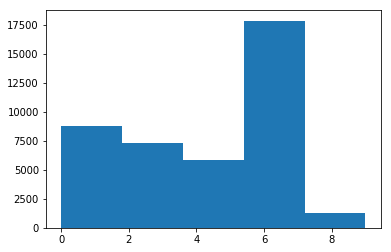

In [42]:
plt.hist(data.month,bins=5)
plt.show()

In [48]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Adult,Middle_Aged,old,primary,secondary,tertiary,unknown,Neg_Balance,No_Balance,Pos_Balance,Not_Contacted,Contacted,t_min,t_e_min,e_min,married,singles,divorced
0,56,3,1,0,0,0,0,1,6,1,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [0]:
dataset.day_of_week.replace(('mon', 'tue','wed','thu','fri','sat','sun'), (1, 2,3,4,5,6,7), inplace=True)

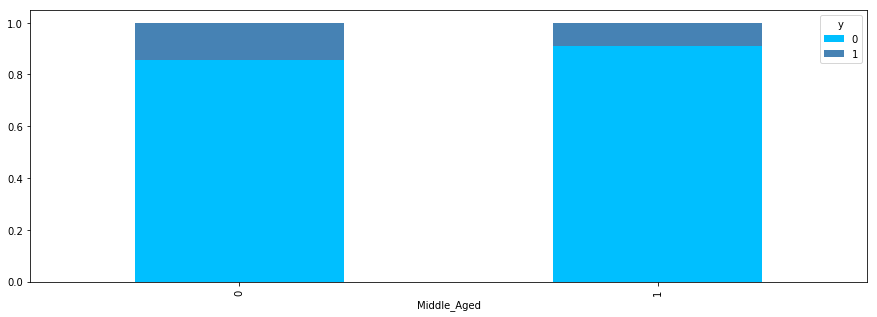

In [49]:
draw_data = pd.crosstab(data.Middle_Aged, data.y)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

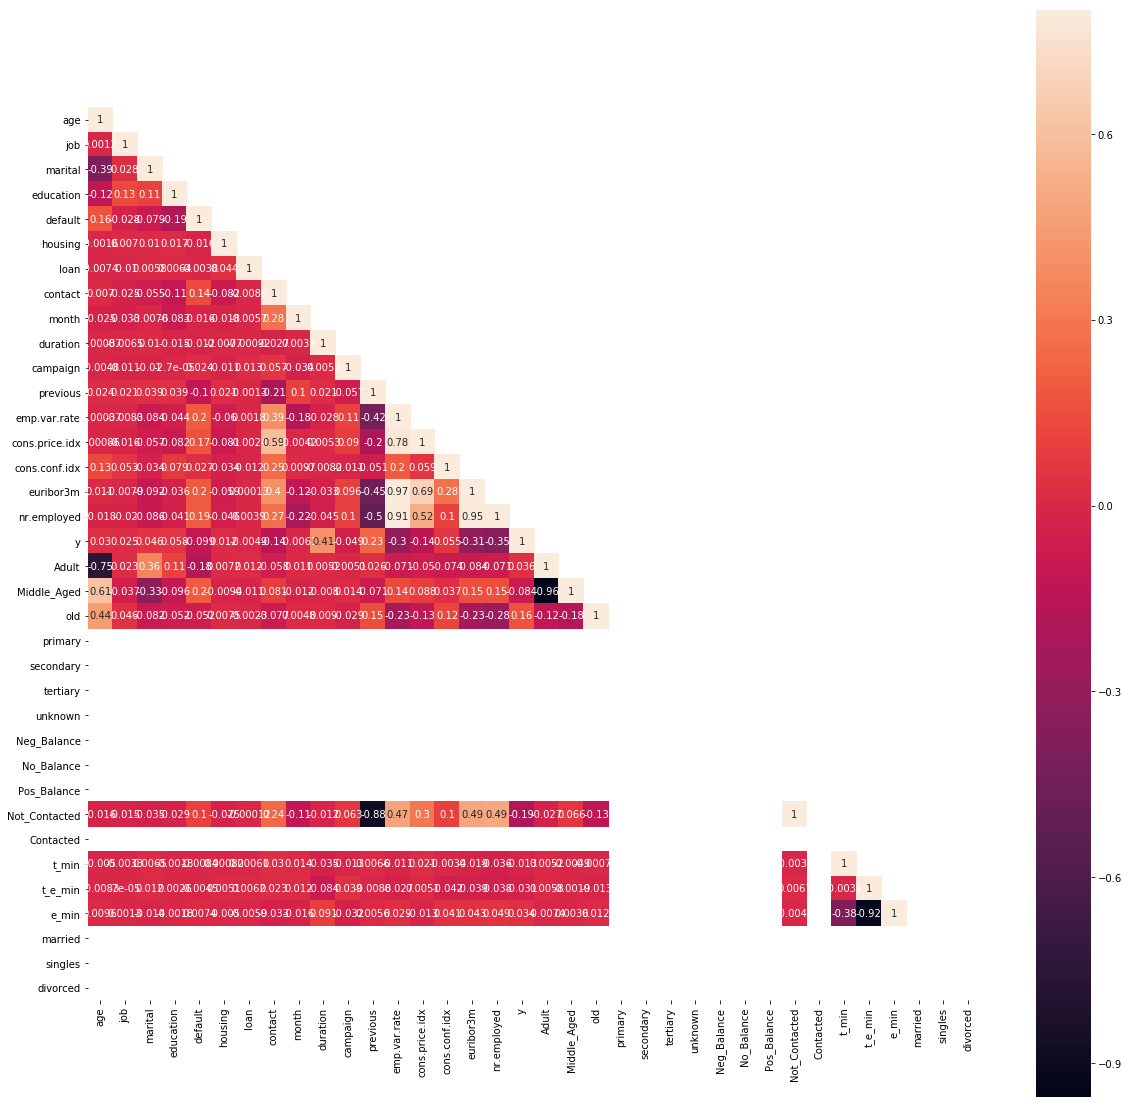

In [50]:
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [51]:
data.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week        object
duration            int64
campaign            int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
Adult               int64
Middle_Aged         int64
old                 int64
primary             int64
secondary           int64
tertiary            int64
unknown             int64
Neg_Balance         int64
No_Balance          int64
Pos_Balance         int64
Not_Contacted       int64
Contacted           int64
t_min               int64
t_e_min             int64
e_min               int64
married             int64
singles             int64
divorced            int64
dtype: object

In [55]:
X.dtypes

job                 int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
campaign            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
Adult               int64
Middle_Aged         int64
old                 int64
primary             int64
secondary           int64
tertiary            int64
unknown             int64
Neg_Balance         int64
No_Balance          int64
Pos_Balance         int64
Not_Contacted       int64
Contacted           int64
t_min               int64
t_e_min             int64
e_min               int64
married             int64
singles             int64
divorced            int64
dtype: object

Feature ranking:
1. feature 11 (0.742835)
2. feature 10 (0.076661)
3. feature 9 (0.066648)
4. feature 5 (0.032633)
5. feature 22 (0.027740)
6. feature 4 (0.022213)
7. feature 13 (0.008971)
8. feature 26 (0.008832)
9. feature 6 (0.008194)
10. feature 0 (0.003644)
11. feature 2 (0.001430)
12. feature 14 (0.000198)
13. feature 17 (0.000000)
14. feature 16 (0.000000)
15. feature 1 (0.000000)
16. feature 27 (0.000000)
17. feature 3 (0.000000)
18. feature 25 (0.000000)
19. feature 24 (0.000000)
20. feature 23 (0.000000)
21. feature 7 (0.000000)
22. feature 8 (0.000000)
23. feature 21 (0.000000)
24. feature 20 (0.000000)
25. feature 19 (0.000000)
26. feature 12 (0.000000)
27. feature 18 (0.000000)
28. feature 28 (0.000000)
29. feature 15 (0.000000)
30. feature 29 (0.000000)


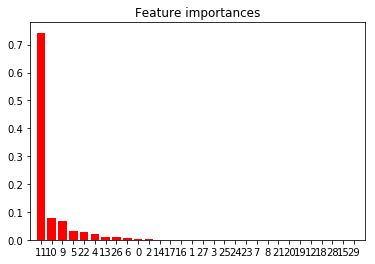

In [53]:
#Feature Importance
from sklearn import tree

y = data.y.values
X = data.drop(['y','previous','age','duration','education','marital','day_of_week'],axis=1)
# Build a forest and compute the feature importances

clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X,y)
importances = clf.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [56]:
X.columns

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary',
       'tertiary', 'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance',
       'Not_Contacted', 'Contacted', 't_min', 't_e_min', 'e_min', 'married',
       'singles', 'divorced'],
      dtype='object')

In [0]:
imp_cols=['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign','emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m','nr.employed', 'Adult', 'Middle_Aged', 'old', 'Not_Contacted','t_min', 't_e_min', 'e_min']
X = data[imp_cols]
y=data.y

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=None)
pca.fit_transform(X_train)
pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.22257136e-01 1.05909934e-01 1.02689019e-01 7.35766746e-02
 6.13723953e-02 5.43633582e-02 5.37901310e-02 5.13152944e-02
 5.02783094e-02 4.98950177e-02 4.75592649e-02 4.24770386e-02
 3.80864600e-02 3.00049273e-02 1.49644788e-02 1.08618342e-03
 3.67668913e-04 6.70802014e-06 3.11344408e-33]


In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

for i in range(1, 13):
    print("No. of Components", i)
    # Applying PCA
    pca=PCA(n_components=i)
    x_train = pca.fit_transform(X_train)
    x_test = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_
    print("CoVariance:", sum(explained_variance)*100)

    regressor = LogisticRegression()
    regressor.fit(x_train, y_train)
    print("Logistic Regressor Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = ensemble.RandomForestClassifier(n_estimators=100)
    regressor.fit(x_train, y_train)
    print("Random Forest Accuracy Score:", regressor.score(x_test, y_test)*100)

    regressor = SVC(kernel='linear',random_state=0)
    regressor.fit(x_train, y_train)
    print("SVC Accuracy Score:", regressor.score(x_test, y_test)*100)

No. of Components 1
CoVariance: 22.225713601722642
Logistic Regressor Accuracy Score: 88.80256385354957
Random Forest Accuracy Score: 86.17072933864233
SVC Accuracy Score: 88.75400602117122
No. of Components 2
CoVariance: 32.81667729240632
Logistic Regressor Accuracy Score: 88.82198698650092
Random Forest Accuracy Score: 88.16160046615519
SVC Accuracy Score: 88.75400602117122
No. of Components 3
CoVariance: 43.08548134612651
Logistic Regressor Accuracy Score: 88.82198698650092
Random Forest Accuracy Score: 88.67631348936584
SVC Accuracy Score: 88.75400602117122
No. of Components 4
CoVariance: 50.443276055771136
Logistic Regressor Accuracy Score: 88.80256385354957
Random Forest Accuracy Score: 87.81198407303098
SVC Accuracy Score: 88.75400602117122
No. of Components 5
CoVariance: 56.580515934814834
Logistic Regressor Accuracy Score: 88.73458288821988
Random Forest Accuracy Score: 87.92852287073904
SVC Accuracy Score: 88.75400602117122
No. of Components 6
CoVariance: 62.01685175913416
Lo

In [0]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

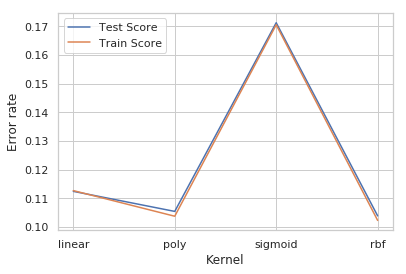

In [63]:
#Rough SVM
kernel = ['linear', 'poly', 'sigmoid', 'rbf']
error_test = []
error_train = []

for i in range(0, len(kernel)):
    clf_svc = SVC(kernel = kernel[i], random_state = 121)
    clf_svc.fit(X_train, y_train)

    error_test.append(zero_one_loss(y_test, clf_svc.predict(X_test)))
    error_train.append(zero_one_loss(y_train, clf_svc.predict(X_train)))


sns.set(style="whitegrid")


plt.plot(kernel, error_test)
plt.plot(kernel, error_train)
plt.xlabel('Kernel')
plt.ylabel('Error rate')

plt.legend(['Test Score', 'Train Score'])

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.001, kernel=linear, score=0.887, total=   4.9s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.887, total=   3.8s
[CV] C=0.001, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.7s remaining:    0.0s


[CV] .............. C=0.001, kernel=linear, score=0.887, total=   4.7s
[CV] C=0.005, kernel=linear ..........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.5s remaining:    0.0s


[CV] .............. C=0.005, kernel=linear, score=0.887, total=   5.4s
[CV] C=0.005, kernel=linear ..........................................
[CV] .............. C=0.005, kernel=linear, score=0.887, total=   3.9s
[CV] C=0.005, kernel=linear ..........................................
[CV] .............. C=0.005, kernel=linear, score=0.887, total=   5.2s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.887, total=   5.8s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.887, total=   3.8s
[CV] C=0.01, kernel=linear ...........................................
[CV] ............... C=0.01, kernel=linear, score=0.887, total=   5.7s
[CV] C=0.015, kernel=linear ..........................................
[CV] .............. C=0.015, kernel=linear, score=0.887, total=   6.0s
[CV] C=0.015, kernel=linear ..........................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:  3.9min finished


{'C': 0.25, 'kernel': 'linear'}


SVC(C=0.25, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.887281087540878


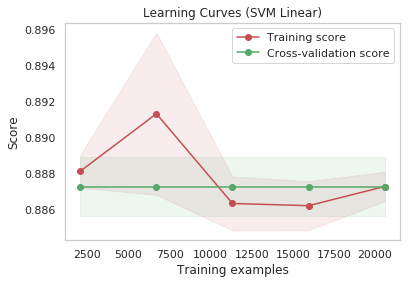

In [64]:
#Linear with CV using Grid search and Learning Curve
param_grid = {'C': [0.001,0.005,0.01,0.015,0.02,0.25,0.3], 'kernel': ['linear']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)



title = "Learning Curves (SVM Linear)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator2 = SVC(kernel = 'linear',C=0.001, random_state = 121)
plot_learning_curve(estimator2, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscore2=cross_val_score(estimator2, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore2.mean())

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.01, degree=2, kernel=poly, score=0.887, total=   6.7s
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s


[CV] ....... C=0.01, degree=2, kernel=poly, score=0.887, total=   6.7s
[CV] C=0.01, degree=2, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.4s remaining:    0.0s


[CV] ....... C=0.01, degree=2, kernel=poly, score=0.887, total=   6.3s
[CV] C=0.01, degree=3, kernel=poly ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s remaining:    0.0s


[CV] ....... C=0.01, degree=3, kernel=poly, score=0.889, total=   7.6s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] ....... C=0.01, degree=3, kernel=poly, score=0.889, total=   7.1s
[CV] C=0.01, degree=3, kernel=poly ...................................
[CV] ....... C=0.01, degree=3, kernel=poly, score=0.887, total=   6.8s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV] ....... C=0.01, degree=4, kernel=poly, score=0.888, total=   6.9s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV] ....... C=0.01, degree=4, kernel=poly, score=0.889, total=   7.6s
[CV] C=0.01, degree=4, kernel=poly ...................................
[CV] ....... C=0.01, degree=4, kernel=poly, score=0.889, total=   7.0s
[CV] C=0.05, degree=2, kernel=poly ...................................
[CV] ....... C=0.05, degree=2, kernel=poly, score=0.892, total=   7.6s
[CV] C=0.05, degree=2, kernel=poly ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed: 24.9min finished


{'C': 0.1, 'degree': 2, 'kernel': 'poly'}


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
0.8918131487764942


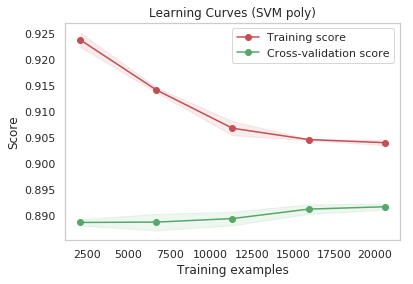

In [65]:
#Poly with CV using GridSearch
param_grid = {'degree': [2,3,4], 'kernel': ['poly'],'C': [0.01,0.05,0.1,1,10]} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator3 = SVC(kernel = 'poly',C=1,degree=4, random_state = 121)
plot_learning_curve(estimator3, title, X_train, y_train,cv=cv)
crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3)
print(crossvalscore3.mean())

In [66]:
#Poly with CV degree 2 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator3 = SVC(kernel = 'poly',degree=2, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore3=cross_val_score(estimator3, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore3.mean())

0.8920396356733186


In [67]:
#Poly with CV degree 3 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator4 = SVC(kernel = 'poly',degree=3, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore4=cross_val_score(estimator4, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore4.mean())

0.8920074272660177


In [68]:
#Poly with CV degree 4 and Learning Curve
title = "Learning Curves (SVM poly)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator5 = SVC(kernel = 'poly',degree=4, random_state = 121)
#plot_learning_curve(estimator3, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore5=cross_val_score(estimator5, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore5.mean())

0.8918131487764942


In [69]:
#Poly with CV degree 6 and Learning Curve
title = "Learning Curves (SVM poly)"
#cv = KFold(n_splits=3, random_state=11, shuffle=False)
estimator6 = SVC(kernel = 'poly',degree=6, random_state = 121)
#plot_learning_curve(estimator6, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore6=cross_val_score(estimator6, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore6.mean())

0.8906153511786347


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.887, total=  11.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.3s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.887, total=  11.3s
[CV] C=0.01, gamma=1, kernel=rbf .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.6s remaining:    0.0s


[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.887, total=  11.3s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.9s remaining:    0.0s


[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.887, total=   9.2s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.887, total=   9.2s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.887, total=   9.4s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.887, total=   8.8s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.887, total=   8.3s
[CV] C=0.01, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=0.01, gamma=0.01, kernel=rbf, score=0.887, total=   8.6s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] ..... C=0.01, gamma=0.001, kernel=rbf, score=0.887, total=   8.3s
[CV] C=0.01, gamma=0.001, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 13.2min finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
0.8909715299799625


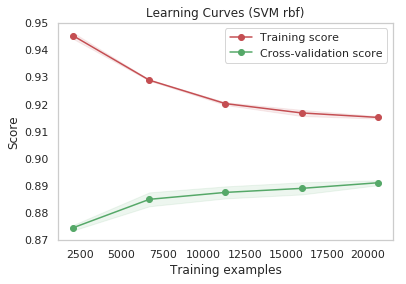

In [70]:
#RBF with CV using Grid search and Learning Curve
from sklearn.model_selection import KFold

param_grid = {'C': [0.01,0.1,1,10], 'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,cv=3,refit=True,verbose=4)
grid.fit(X_train,y_train)
print (grid.best_params_)
print ('\n')
print (grid.best_estimator_)


estimator1 = SVC(kernel = 'rbf', C=10, gamma=0.1, random_state = 121)
title = "Learning Curves (SVM rbf)"
cv = KFold(n_splits=3, random_state=11, shuffle=False)
plot_learning_curve(estimator1, title, X_train, y_train, cv=cv, n_jobs=4)

crossvalscore1=cross_val_score(estimator1, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscore1.mean())

In [71]:
#Descision trees with different depth,leaf nodes, samples split
param_grid = {"criterion": ["gini", "entropy"],
             "min_samples_split": [2,3,4,5,6,7,8,9,10],
             "max_depth": [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,25,30,32,35],
             "min_samples_leaf": [5,10,15,20],
             "max_leaf_nodes": [2,3,4,5,6,7,8,9]
             }

dt = DecisionTreeClassifier()
ts_gs = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=3, return_train_score=True)
ts_gs.fit(X_train,y_train)
print (ts_gs.best_params_)
print ('\n')
print (ts_gs.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_leaf': 5, 'min_samples_split': 2}


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


0.8881551756855305


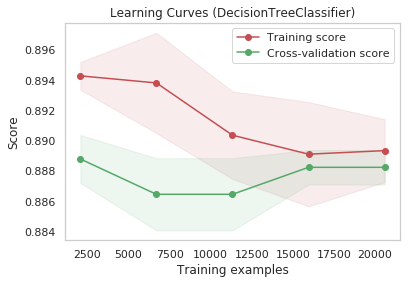

In [72]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
ts_gs=DecisionTreeClassifier(criterion = 'gini',max_depth=2, max_leaf_nodes = 4, min_samples_leaf=20, min_samples_split=2)
title = "Learning Curves (DecisionTreeClassifier)"
plot_learning_curve(ts_gs, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(ts_gs, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())


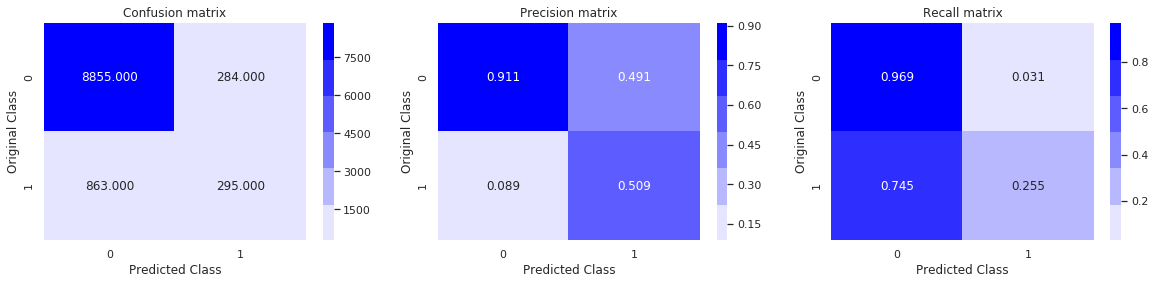

In [73]:
ts_gs=DecisionTreeClassifier(criterion = 'gini',max_depth=2, max_leaf_nodes = 4, min_samples_leaf=20, min_samples_split=2)
ts_gs.fit(X_train,y_train)
Y_pred = ts_gs.predict(X_test)
plot_confusion_matrix(y_test, Y_pred)

In [0]:
import xgboost as xgb

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,precision_score,recall_score

base_learners = [1,4,8,12,16,20,25,30,35,40,45]
min_samples_leaf=[0.1,0.20,0.30,0.40,0.5]
min_samples_split= [0.4,0.5,0.6,0.7,0.8,0.9]
depth = [1,2,3,5,7,9,11,13,15,17,19]
param_grid ={'n_estimators': base_learners,'max_depth': depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
RFC = RandomForestClassifier(max_features='sqrt')
model = GridSearchCV(RFC, param_grid, scoring = 'f1_weighted', cv=3 , n_jobs = -1,pre_dispatch=2)
model.fit(X_train, y_train)
print("Model with best parameters :\n",model.best_estimator_)
print("Accuracy of the model : ",model.score(X_test, y_test))
# Optimal value of number of base learners
optimal_learners = model.best_estimator_.n_estimators
print("The optimal number of base learners is : ",optimal_learners)

optimal_depth=model.best_estimator_.max_depth
print("The optimal number of depth is : ",optimal_depth)

Model with best parameters :
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=1, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=0.4,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy of the model :  0.8346602809502818
The optimal number of base learners is :  1
The optimal number of depth is :  1


In [76]:
print("Best HyperParameter: ",model.best_params_)
print(model.best_score_)


Best HyperParameter:  {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.4, 'n_estimators': 1}
0.8342877281092876


In [0]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [0]:
optimal_spilt=model.best_estimator_.min_samples_split
optimal_leaf=model.best_estimator_.min_samples_leaf

0.887281087540878


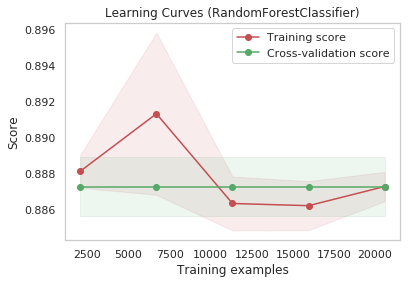

In [79]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
ts_gs=RandomForestClassifier(n_estimators=optimal_learners, max_features='sqrt', n_jobs=-1,min_samples_split=optimal_spilt,min_samples_leaf=optimal_leaf)
title = "Learning Curves (RandomForestClassifier)"
plot_learning_curve(ts_gs, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(ts_gs, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())


Accuracy of the model at optimal hyperparameter depth = 1 is:  88.754006%
Confusion matrix for the model is:


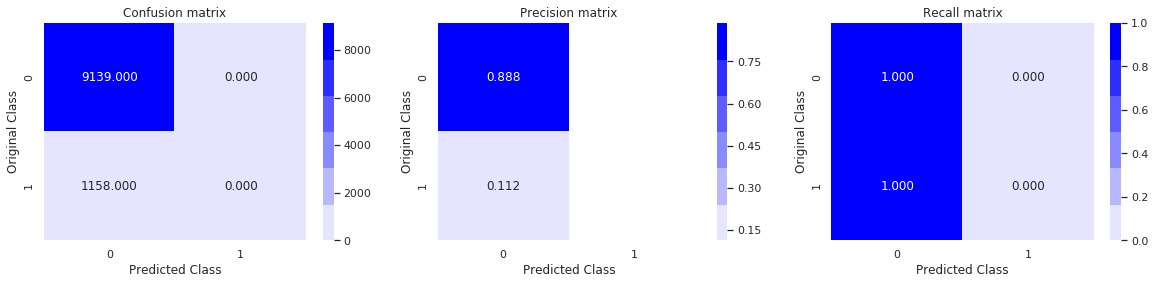

f1 score value for   the model is: 0.8346602809502818
precision score  for   the model is: 0.0


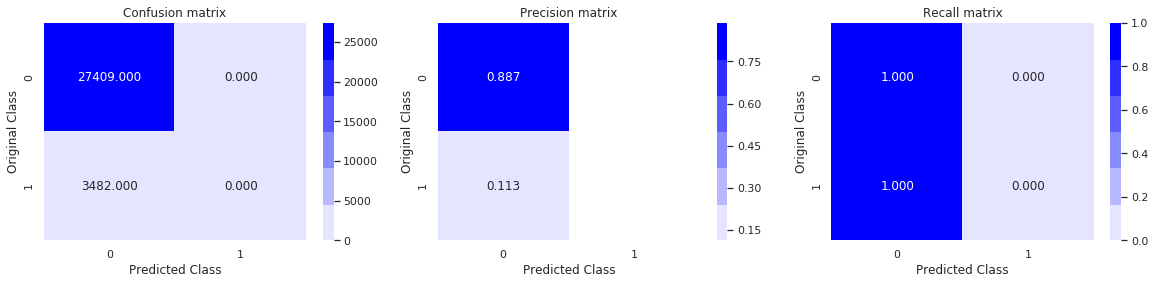

Accuracy of the model at optimal hyperparameter depth = 1 is:  88.728109%
f1 score value for   the model is: 0.834287727672795
precision score  for   the model is: 0.0


In [80]:
#confusion matrix,precision matrix,recall matrix,accuracy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
rf = RandomForestClassifier(n_estimators=optimal_learners, max_features='sqrt', n_jobs=-1,min_samples_split=optimal_spilt,min_samples_leaf=optimal_leaf)
rf.fit(X_train,y_train)
Y_pred = rf.predict(X_test)
Y_test_accuracy = accuracy_score(y_test, Y_pred, normalize=True, sample_weight=None)*100
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_test_accuracy))
print('Confusion matrix for the model is:')
plot_confusion_matrix(y_test, Y_pred)
f1score= f1_score(y_test, Y_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_test, Y_pred )
print('precision score  for   the model is: %s'% precisionscore)
y_train_pred = rf.predict(X_train)
Y_train_accuracy =accuracy_score(y_train, y_train_pred, normalize=True, sample_weight=None)*100
plot_confusion_matrix(y_train, y_train_pred)
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_train_accuracy))
f1score= f1_score(y_train, y_train_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_train, y_train_pred )
print('precision score  for   the model is: %s'% precisionscore)

In [82]:
# Importing library
from sklearn.ensemble import GradientBoostingClassifier

base_learners = [1,2,4,8,12,14,16,18,20]
depth = [1,3,5,7,9,11,13,15,17,19,]
min_samples_split=[0.5,0.6,0.7,0.8,0.9]
min_samples_leaf=[0.1,0.2,0.3,0.4,0.5]
param_grid = {'n_estimators': base_learners,  'max_depth': depth,'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}
GBC = GradientBoostingClassifier(max_features='sqrt',subsample=0.1)
model = GridSearchCV(GBC, param_grid, scoring = 'f1_weighted', cv=3, n_jobs = -1,pre_dispatch=2)
model.fit(X_train, y_train)
print("Model with best parameters :\n",model.best_estimator_)
print("Accuracy of the model : ",model.score(X_test, y_test))

# Optimal value of number of base learners
optimal_learners = model.best_estimator_.n_estimators
print("The optimal number of base learners is : ",optimal_learners)

# Optimal value of learning rate
optimal_depth = model.best_estimator_.max_depth
print("\nThe optimal value of max depth is : ",optimal_depth)

Model with best parameters :
 GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=0.1, min_samples_split=0.5,
                           min_weight_fraction_leaf=0.0, n_estimators=1,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy of the model :  0.8346602809502818
The optimal number of base learners is :  1

The optimal value of max depth is :  1


In [0]:
optimal_spilt=model.best_estimator_.min_samples_split
optimal_leaf=model.best_estimator_.min_samples_leaf

In [84]:
print("Best HyperParameter: ",model.best_params_)
print(model.best_score_)

Best HyperParameter:  {'max_depth': 1, 'min_samples_leaf': 0.1, 'min_samples_split': 0.5, 'n_estimators': 1}
0.8342877281092876


0.887281087540878


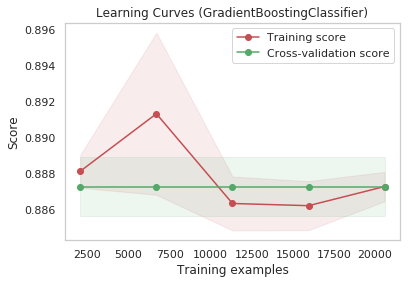

In [85]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
gb=GradientBoostingClassifier(n_estimators=optimal_learners,min_samples_split=optimal_spilt,min_samples_leaf=optimal_leaf)
title = "Learning Curves (GradientBoostingClassifier)"
plot_learning_curve(gb, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(gb, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())


Accuracy of the model at optimal hyperparameter depth = 1 is:  88.754006%
Confusion matrix for the model is:


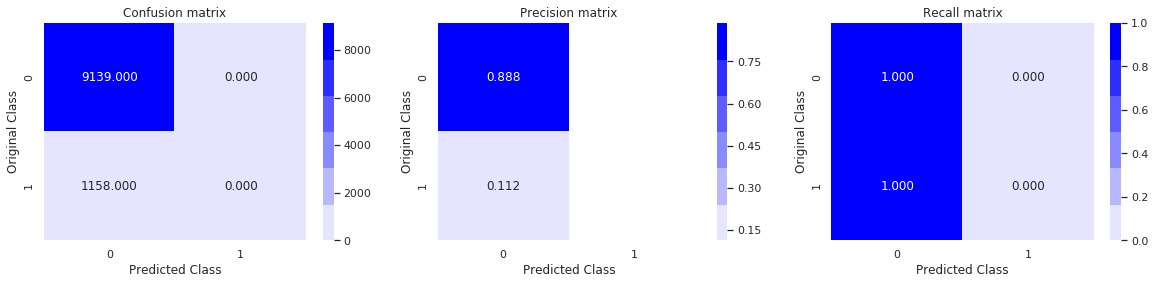

f1 score value for   the model is: 0.8346602809502818
precision score  for   the model is: 0.0


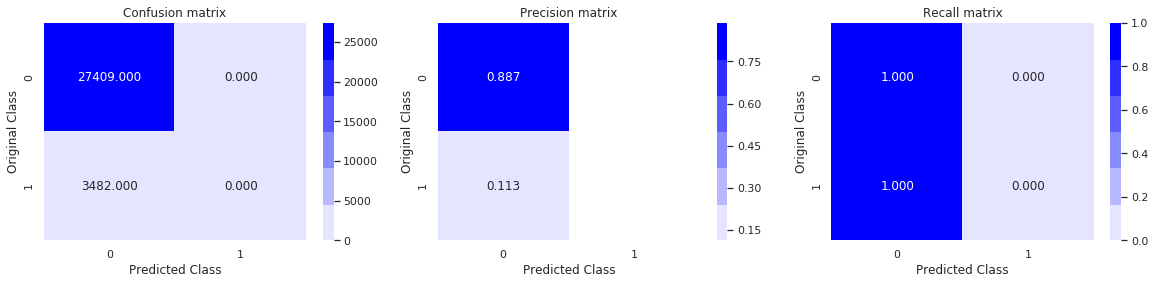

Accuracy of the model at optimal hyperparameter depth = 1 is:  88.728109%
f1 score value for   the model is: 0.834287727672795
precision score  for   the model is: 0.0


In [86]:
#confusion matrix,precision matrix,recall matrix,accuracy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
gb = GradientBoostingClassifier(n_estimators=optimal_learners, max_depth=optimal_depth,min_samples_split=optimal_spilt,min_samples_leaf=optimal_leaf)
gb.fit(X_train,y_train)
Y_pred = gb.predict(X_test)
Y_test_accuracy = accuracy_score(y_test, Y_pred, normalize=True, sample_weight=None)*100
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_test_accuracy))
print('Confusion matrix for the model is:')
plot_confusion_matrix(y_test, Y_pred)
f1score= f1_score(y_test, Y_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_test, Y_pred )
print('precision score  for   the model is: %s'% precisionscore)
y_train_pred = rf.predict(X_train)
Y_train_accuracy =accuracy_score(y_train, y_train_pred, normalize=True, sample_weight=None)*100
plot_confusion_matrix(y_train, y_train_pred)
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_train_accuracy))
f1score= f1_score(y_train, y_train_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_train, y_train_pred )
print('precision score  for   the model is: %s'% precisionscore)

In [88]:
# Importing library
param_grid = {
    "learning_rate": [0.1,],
    'max_depth': [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29],
    'min_child_weight': [2,4,6,8,10,12],
    'subsample': [.8],
    'n_estimators': [1,2,4,8,6,10,12,14,16,18,20]
}
xg = xgb.XGBClassifier(max_features='sqrt',subsample=0.1)
model = GridSearchCV(xg, param_grid, scoring = 'f1_weighted', cv=3, n_jobs = -1,pre_dispatch=2)
model.fit(X_train, y_train)
print("Model with best parameters :\n",model.best_estimator_)
print("Accuracy of the model : ",model.score(X_test, y_test))

# Optimal value of number of base learners
optimal_learners = model.best_estimator_.n_estimators
print("The optimal number of base learners is : ",optimal_learners)

# Optimal value of learning rate
optimal_depth = model.best_estimator_.max_depth
print("\nThe optimal value of max depth is : ",optimal_depth)

Model with best parameters :
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=11,
              max_features='sqrt', min_child_weight=4, missing=None,
              n_estimators=18, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.8, verbosity=1)
Accuracy of the model :  0.8774321842282794
The optimal number of base learners is :  18

The optimal value of max depth is :  11


In [0]:
optimal_weight=model.best_estimator_.min_child_weight
optimal_subsample=model.best_estimator_.subsample
optimal_rate=model.best_estimator_.learning_rate

0.8933347218553608


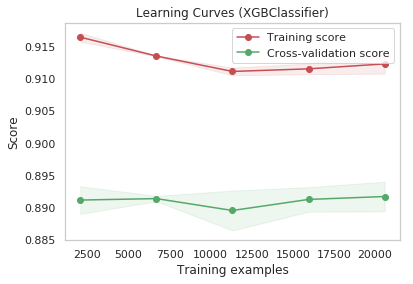

In [90]:
cv = KFold(n_splits=3, random_state=11, shuffle=False)
gb=xgb.XGBClassifier(n_estimators=optimal_learners, max_depth=optimal_depth,min_child_weight=optimal_weight,subsample=optimal_subsample,learning_rate=optimal_rate)
title = "Learning Curves (XGBClassifier)"
plot_learning_curve(gb, title, X_train, y_train,cv=cv, n_jobs=4)

crossvalscoredes=cross_val_score(gb, X_train, y_train, cv=3, n_jobs=-1)
print(crossvalscoredes.mean())


Accuracy of the model at optimal hyperparameter depth = 18 is:  89.501797%
Confusion matrix for the model is:


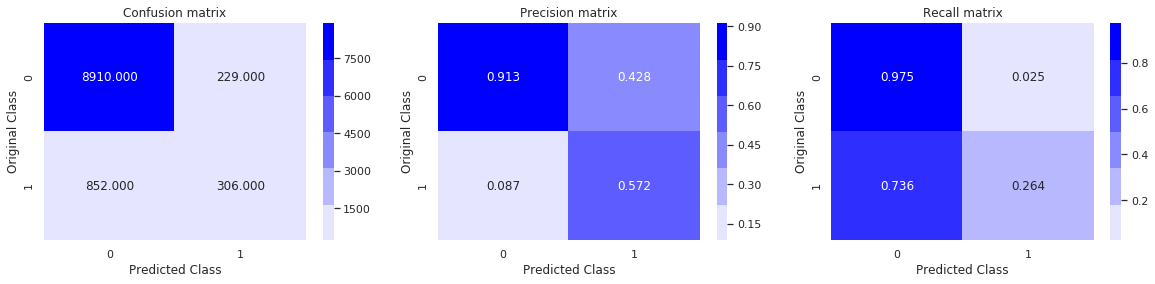

f1 score value for   the model is: 0.8774321842282794
precision score  for   the model is: 0.5719626168224299


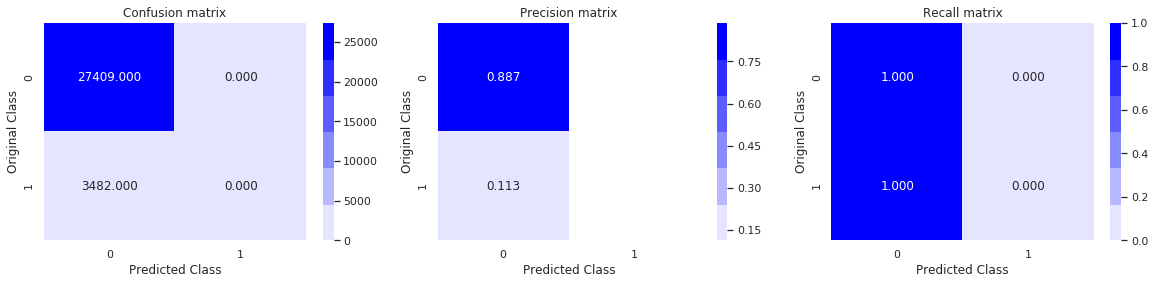

Accuracy of the model at optimal hyperparameter depth = 18 is:  88.728109%
f1 score value for   the model is: 0.834287727672795
precision score  for   the model is: 0.0


In [91]:
#confusion matrix,precision matrix,recall matrix,accuracy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score
xg = xgb.XGBClassifier(n_estimators=optimal_learners, max_depth=optimal_depth,min_child_weight=optimal_weight,subsample=optimal_subsample,learning_rate=optimal_rate)
xg.fit(X_train,y_train)
Y_pred = xg.predict(X_test)
Y_test_accuracy = accuracy_score(y_test, Y_pred, normalize=True, sample_weight=None)*100
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_test_accuracy))
print('Confusion matrix for the model is:')
plot_confusion_matrix(y_test, Y_pred)
f1score= f1_score(y_test, Y_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_test, Y_pred )
print('precision score  for   the model is: %s'% precisionscore)
y_train_pred = rf.predict(X_train)
Y_train_accuracy =accuracy_score(y_train, y_train_pred, normalize=True, sample_weight=None)*100
plot_confusion_matrix(y_train, y_train_pred)
print('Accuracy of the model at optimal hyperparameter depth = %d is:  %f%%' % (optimal_learners,Y_train_accuracy))
f1score= f1_score(y_train, y_train_pred, average='weighted')
print('f1 score value for   the model is: %s'% f1score)
precisionscore=precision_score(y_train, y_train_pred )
print('precision score  for   the model is: %s'% precisionscore)